<a href="https://colab.research.google.com/github/tuananh11052000/CS114.K21/blob/master/CUOI%20KY/detect_animal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Kết nối với google driver để truy xuất dataset

In [38]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Import các thư viện cần thiết để sử dụng cho các shell tiếp theo

In [27]:
import glob
import cv2
import numpy as np
import os
import random
import skimage
from skimage import feature
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from google.colab.patches import cv2_imshow

Định nghĩa hàm HOG rút trích đặc trưng sử dụng trọng số truyền vào

In [28]:
class HOG:
    def __init__(self, orientations=12, pixelsPerCell=(2, 2), cellsPerBlock=(2, 2), normalize=True):
        # store the number of orientations, pixels per cell, cells per block, and
        # whether normalization should be applied to the image
        self.orientations = orientations
        self.pixelsPerCell = pixelsPerCell
        self.cellsPerBlock = cellsPerBlock
        self.normalize = normalize

    def describe(self, image):
        # compute Histogram of Oriented Gradients features for scikit-image < 0.13
        if int(skimage.__version__.split(".")[1]) < 13:
            
            hist = feature.hog(image, orientations=self.orientations, pixels_per_cell=self.pixelsPerCell,
                               cells_per_block=self.cellsPerBlock, transform_sqrt=self.normalize)

        # otherwise comput Histogram of Oriented Gradients features for scikit-image >= 0.13
        else:
            hist = feature.hog(image, orientations=self.orientations, pixels_per_cell=self.pixelsPerCell,
                               cells_per_block=self.cellsPerBlock, transform_sqrt=self.normalize, block_norm="L1")

        hist[hist < 0] = 0

        # return the histogram
        return hist



*   Đọc dữ liệu từ google driver
*   Đọc ảnh và gán nhãn



In [39]:
datasetPaths = []
labels = []
data = []
for linkimage in glob.iglob('/content/drive/My Drive/Colab Notebooks/detect_animal_gray/*/*.png', recursive=True):
    datasetPaths.append(linkimage);
random.shuffle(datasetPaths)
for path in datasetPaths:
  labels.append(path.split(os.path.sep)[-2])
  img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
  img = cv2.resize(img, (140, 110))
  data.append(img)

*   Chuyển nhãn về dạng số để phù hợp cho việc train model
*   Trong bước này, ảnh không có động vật là 1
*   Ảnh có động vật 0

In [40]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(labels)
le.classes_
lb = le.transform(labels)

In [43]:
print(labels)
print(lb)

['non_animal', 'animal', 'non_animal', 'non_animal', 'non_animal', 'non_animal', 'non_animal', 'animal', 'animal', 'non_animal', 'non_animal', 'animal', 'non_animal', 'non_animal', 'animal', 'non_animal', 'non_animal', 'non_animal', 'non_animal', 'animal', 'non_animal', 'animal', 'animal', 'animal', 'non_animal', 'non_animal', 'non_animal', 'non_animal', 'non_animal', 'non_animal', 'animal', 'non_animal', 'non_animal', 'non_animal', 'non_animal', 'non_animal', 'animal', 'non_animal', 'non_animal', 'animal', 'non_animal', 'non_animal', 'non_animal', 'non_animal', 'non_animal', 'non_animal', 'non_animal', 'non_animal', 'non_animal', 'non_animal', 'non_animal', 'non_animal', 'non_animal', 'non_animal', 'non_animal', 'non_animal', 'non_animal', 'non_animal', 'animal', 'non_animal', 'animal', 'non_animal', 'non_animal', 'non_animal', 'non_animal', 'non_animal', 'non_animal', 'non_animal', 'animal', 'non_animal', 'animal', 'non_animal', 'non_animal', 'animal', 'non_animal', 'non_animal', 'an

**Sử dụng HOG để rút trích đặc trưng**




In [44]:
features = []
hog = HOG(orientations=12, pixelsPerCell=(4, 4), cellsPerBlock=(2, 2), normalize=True)
for img in data:
  features.append(hog.describe(img))

Chia bộ train test theo tỷ lệ 75-25

In [45]:
x_train, x_test, y_train, y_test = train_test_split(features, lb, test_size=0.15)

Sử dụng SVM để train trên bộ feature đã thu được ở trên

In [46]:
model = SVC(kernel="linear", probability=False, random_state=42)
model.fit(x_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=42, shrinking=True, tol=0.001,
    verbose=False)

In [47]:
from sklearn.metrics import accuracy_score
pred = model.predict(x_test)
print('acc: ', accuracy_score(pred, y_test))

acc:  0.9482758620689655


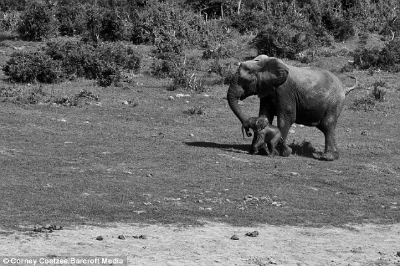

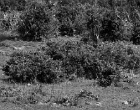

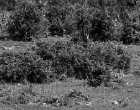

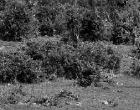

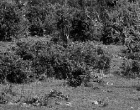

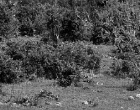

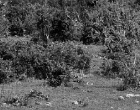

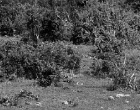

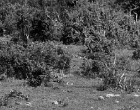

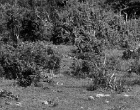

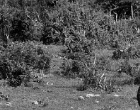

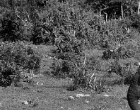

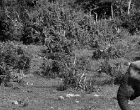

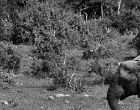

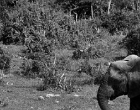

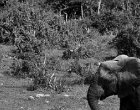

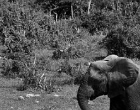

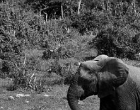

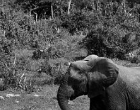

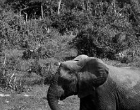

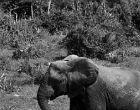

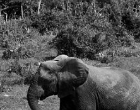

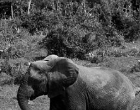

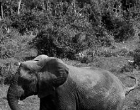

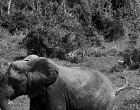

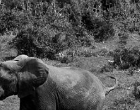

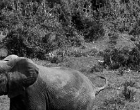

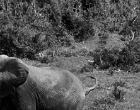

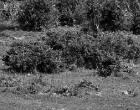

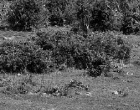

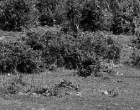

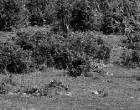

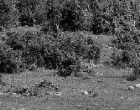

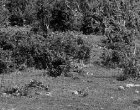

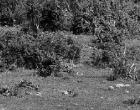

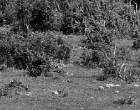

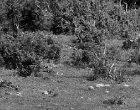

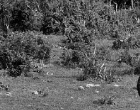

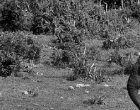

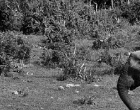

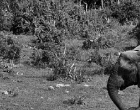

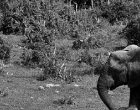

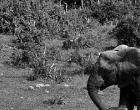

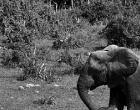

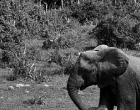

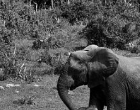

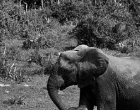

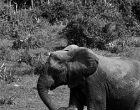

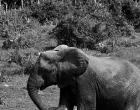

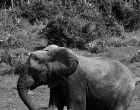

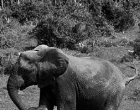

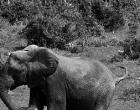

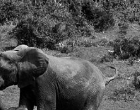

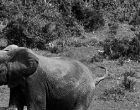

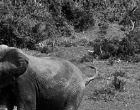

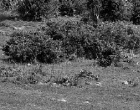

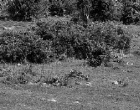

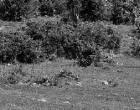

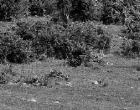

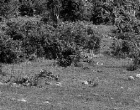

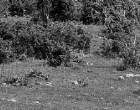

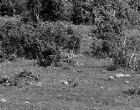

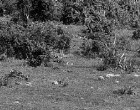

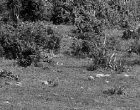

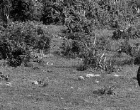

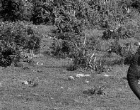

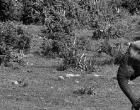

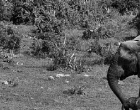

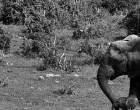

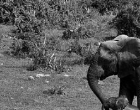

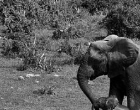

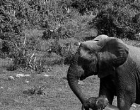

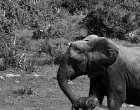

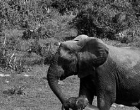

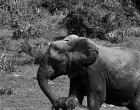

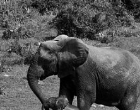

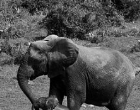

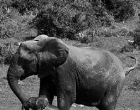

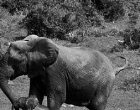

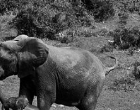

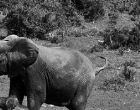

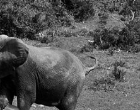

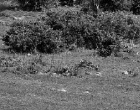

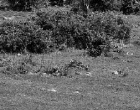

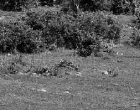

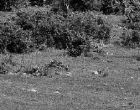

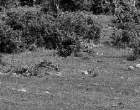

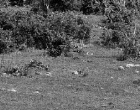

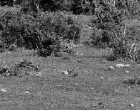

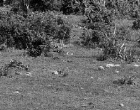

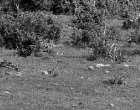

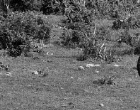

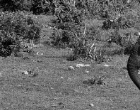

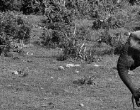

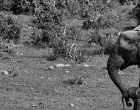

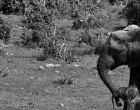

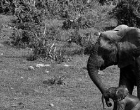

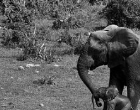

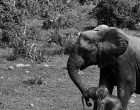

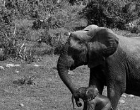

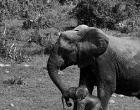

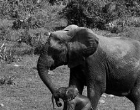

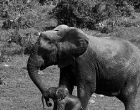

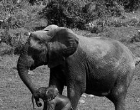

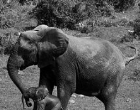

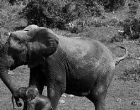

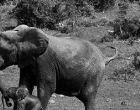

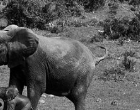

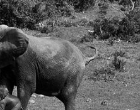

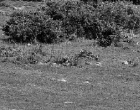

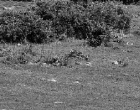

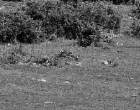

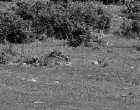

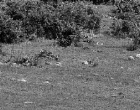

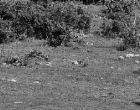

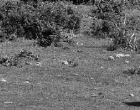

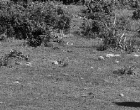

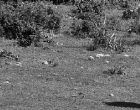

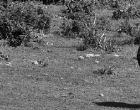

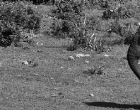

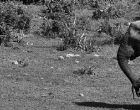

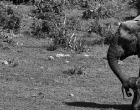

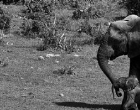

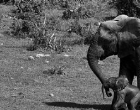

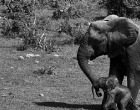

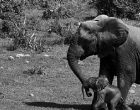

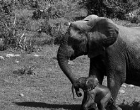

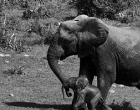

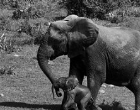

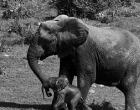

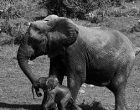

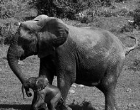

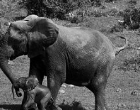

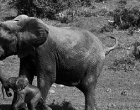

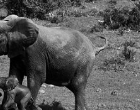

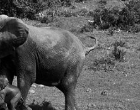

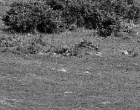

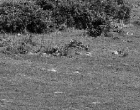

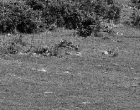

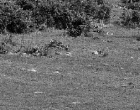

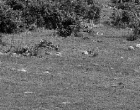

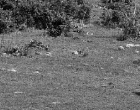

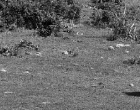

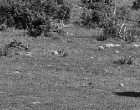

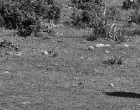

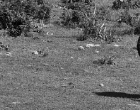

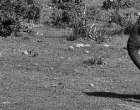

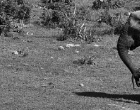

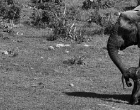

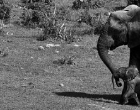

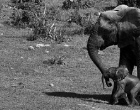

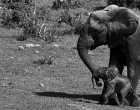

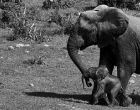

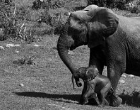

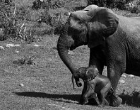

[0]


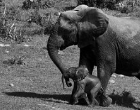

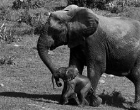

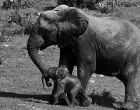

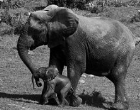

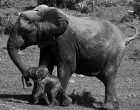

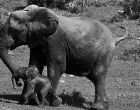

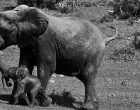

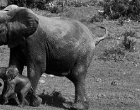

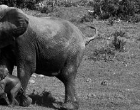

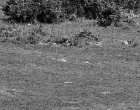

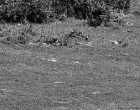

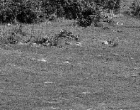

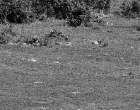

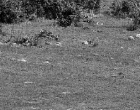

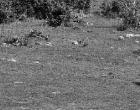

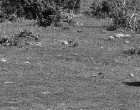

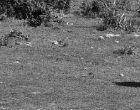

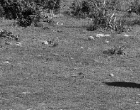

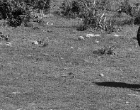

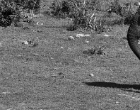

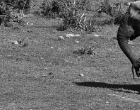

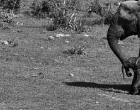

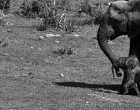

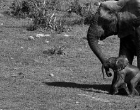

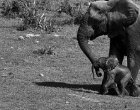

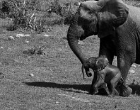

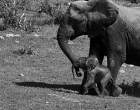

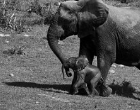

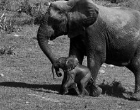

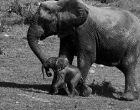

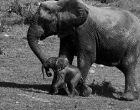

[0]


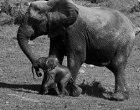

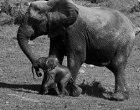

[0]


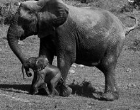

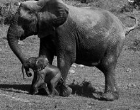

[0]


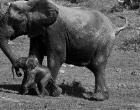

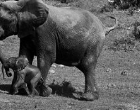

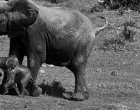

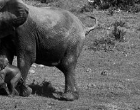

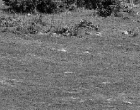

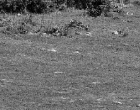

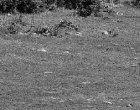

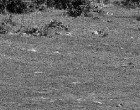

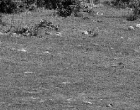

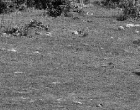

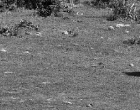

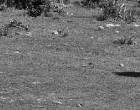

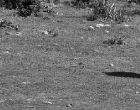

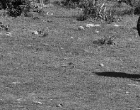

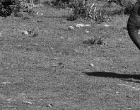

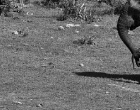

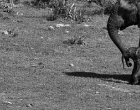

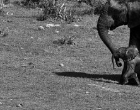

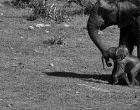

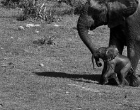

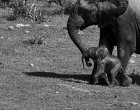

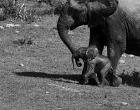

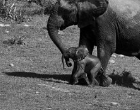

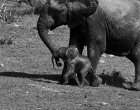

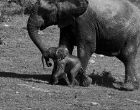

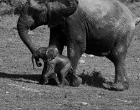

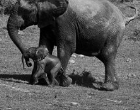

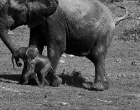

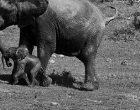

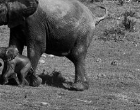

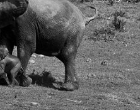

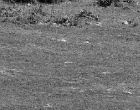

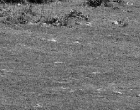

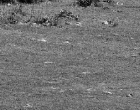

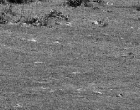

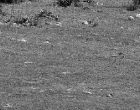

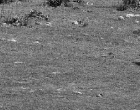

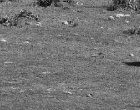

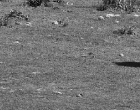

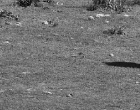

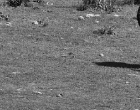

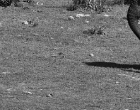

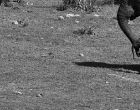

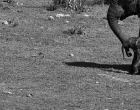

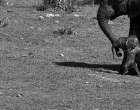

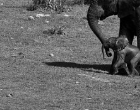

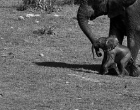

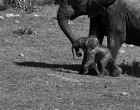

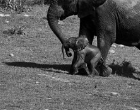

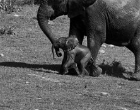

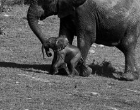

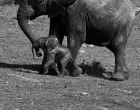

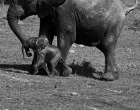

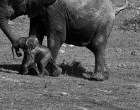

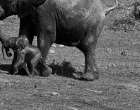

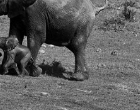

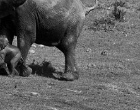

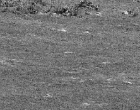

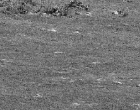

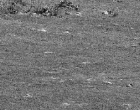

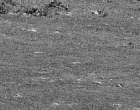

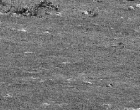

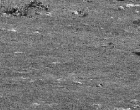

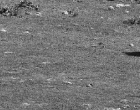

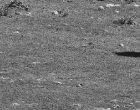

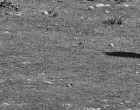

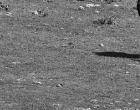

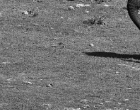

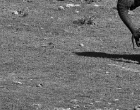

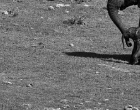

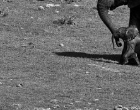

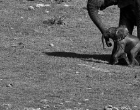

In [ ]:
IMG_PATH = '3.jpg'
# read image
img = cv2.imread(IMG_PATH, cv2.IMREAD_GRAYSCALE)
heigh, width = img.shape
ratio = heigh/width;
new_width = 400;
new_heigh = int(new_width * ratio);
img_resize = cv2.resize(img, (new_width, new_heigh))
cv2_imshow(img_resize)
x = 0
pred=0
while(x + 110 <= new_heigh):
  y = 0
  while(y + 140 <= new_width):
    wd = img_resize[x:x+110, y:y+140]
    wd = cv2.resize(wd, (140, 110))
    cv2_imshow(wd)
    temp1 = hog.describe(wd)
    temp = model.predict([temp1])
    if temp == [0]:
      pred = 1
      cv2_imshow(wd)
      print(temp)
    y = y + 10
  x = x + 10
print(pred);

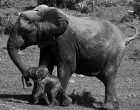

[1]


In [37]:
IMG_PATH = '1.jpg'
# read image
test = cv2.imread(IMG_PATH, cv2.IMREAD_GRAYSCALE)
test = cv2.resize(test, (140, 110))
cv2_imshow(test)
test_feature = hog.describe(test)
score = model.predict([test_feature])
print(score)

# Sử dụng KNN


In [ ]:
from sklearn import neighbors, datasets
clf = neighbors.KNeighborsClassifier(n_neighbors = 5, p = 1)
clf.fit(x_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=20, p=1,
                     weights='uniform')

In [ ]:
pred = clf.predict(x_test)
print('acc: ', accuracy_score(pred, y_test))

acc:  0.28725961538461536
